### `Name:Rahul Limbachiya`

### Task 6: Prediction using Decision Tree Algorithm. 
### GRIPJUNE21 @ The Sparks Foundation
#### Data Science and Business Analytics Intern

#### Objective: Create the Decision Tree classifier and visualize it graphically.

__Problem Statement:__ `The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.`

`Decision Tree is type of Supervised Machine Learning where the data is continuously split according to a certain parameter.
The goal of using Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from training data.`

Dataset can be found [here](https://bit.ly/3kXTdox)

__*Import the revelent libraries*__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

__*Loading Dataset from the source*__

In [2]:
df=pd.read_csv('Iris.csv')
print('The dataset has imported ')

The dataset has imported 


__*Exploratory data analysis*__

In [3]:
pd.set_option('max_columns',None)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


__*Droping some irrelavant columns*__

In [7]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

__*Removing the duplicate values*__

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

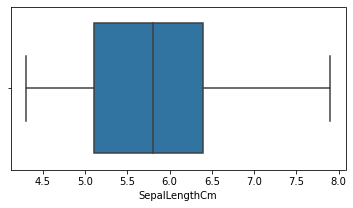

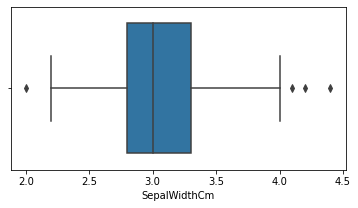

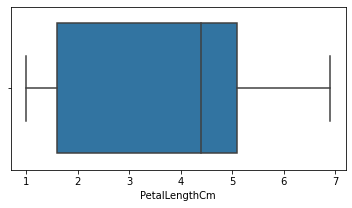

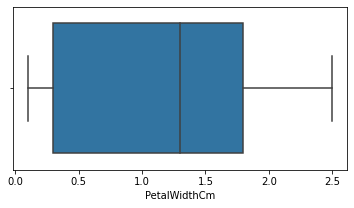

In [11]:
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[i],data=df)
        plt.show()

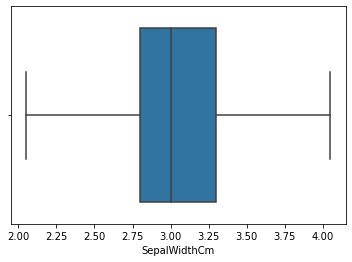

In [12]:
q1,q3=np.percentile(df['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)
sns.boxplot(x=df['SepalWidthCm'],data=df)

### Data Visualization 

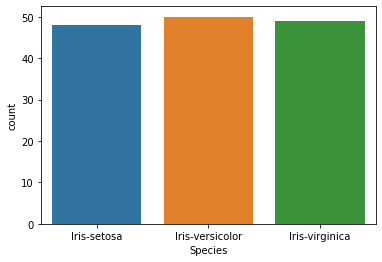

In [13]:
sns.countplot(x=df['Species'],data=df)

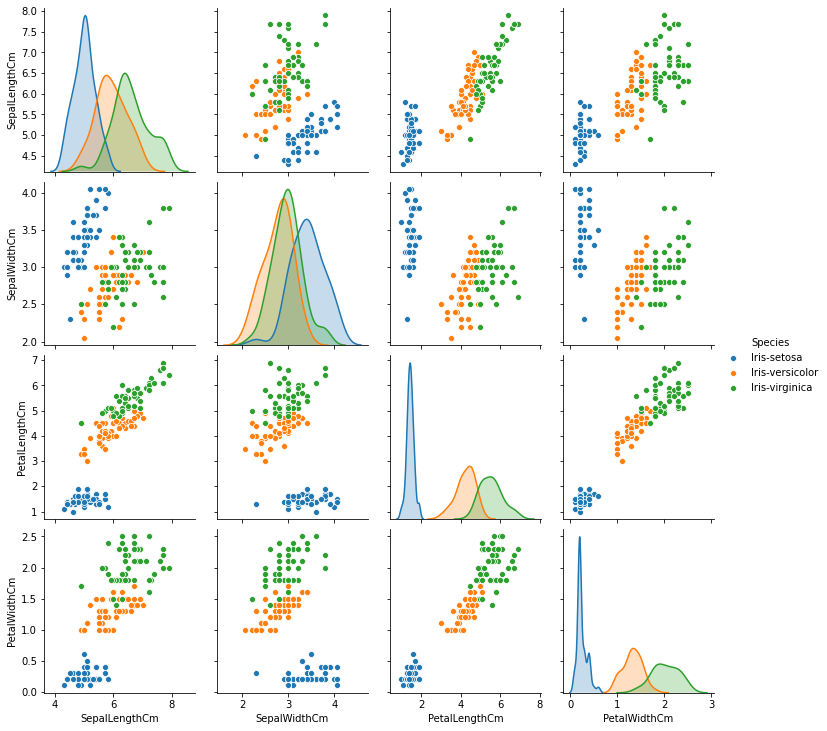

In [14]:
sns.pairplot(df,hue='Species')

From the above figures we can conclude that:

- Iris-setosa can be easily identified whereas, Iris-versicolor and Iris-virginica are overlapping.

- Petal length and petal width are the most important features to identify the flowers.

By looking the result of pair plot we sure that all the blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

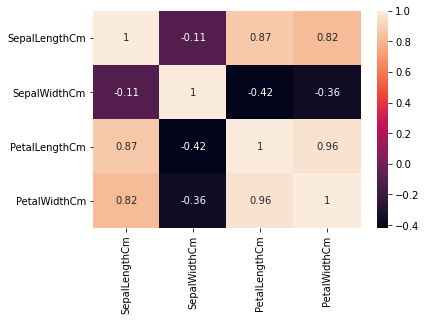

In [15]:
sns.heatmap(df.corr(),annot=True)

> The above HeatMap shows that Petal Length and Petal Width are highly correlated with each other, Sepal Length is Moderately correlated with Petal Length and Petal Width, whereas Sepal Width is negatively correlated with other three.

### Data Preparing

In [16]:
X=df.iloc[:, :4].values
Y=df.iloc[:, 4].values

### Training the Model
> We here split our data into training and testing sets, and then we finally train our algorithm.



In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Visualization of Decision Tree

[Text(372.0, 757.1571428571428, 'PetalWidthCm <= 0.8\nentropy = 1.5805\nsamples = 110\nvalue = [33, 37, 40]\nclass = Iris-virginica'),
 Text(279.0, 640.6714285714286, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(465.0, 640.6714285714286, 'PetalWidthCm <= 1.75\nentropy = 0.9989\nsamples = 77\nvalue = [0, 37, 40]\nclass = Iris-virginica'),
 Text(279.0, 524.1857142857143, 'PetalLengthCm <= 5.35\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(186.0, 407.7, 'PetalWidthCm <= 1.45\nentropy = 0.2975\nsamples = 38\nvalue = [0, 36, 2]\nclass = Iris-versicolor'),
 Text(93.0, 291.21428571428567, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = Iris-versicolor'),
 Text(279.0, 291.21428571428567, 'SepalWidthCm <= 2.6\nentropy = 0.684\nsamples = 11\nvalue = [0, 9, 2]\nclass = Iris-versicolor'),
 Text(186.0, 174.7285714285714, 'SepalLengthCm <= 6.1\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),


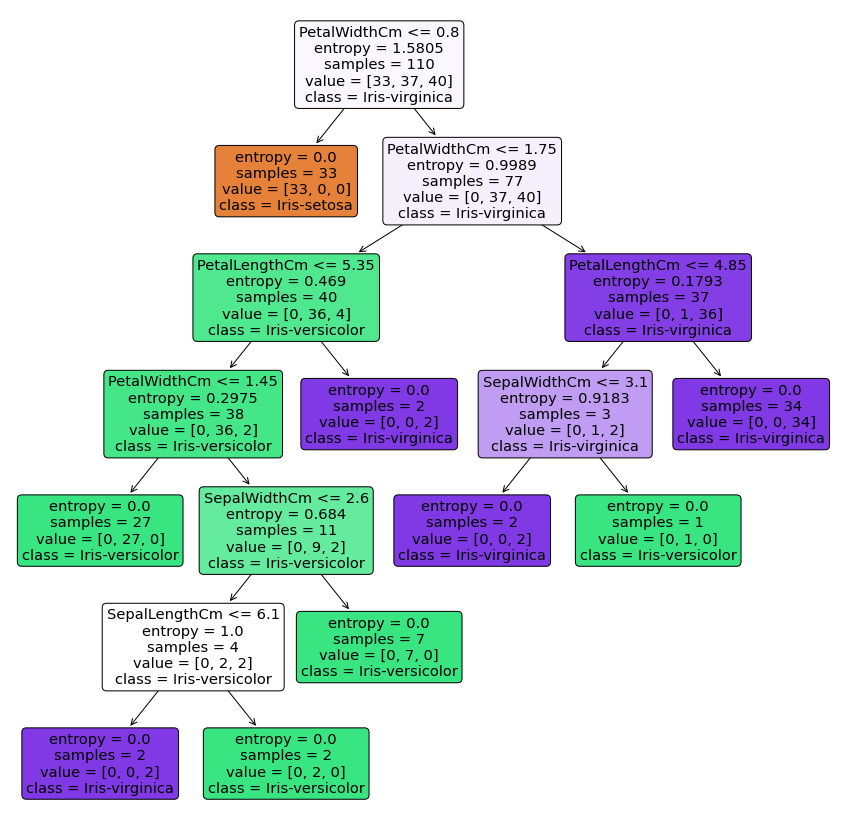

In [19]:
plt.figure(figsize=(15,15))
plot_tree(dtree,feature_names=df.columns,class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],
          filled=True,precision=4,rounded=True)

__*Predictions on the test dataset*__


In [20]:
pred=dtree.predict(x_test)  
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


In [21]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

y_preds = dtree.predict(x_test)

print("Model Accuracy Score of totally unseen data (X_test) is: ", accuracy_score(y_test, y_preds) * 100, '%')
print(multilabel_confusion_matrix(y_test, y_preds))

Model Accuracy Score of totally unseen data (X_test) is:  97.2972972972973 %
[[[22  0]
  [ 0 15]]

 [[23  1]
  [ 0 13]]

 [[28  0]
  [ 1  8]]]


In [22]:
print("Accuracy: ",dtree.score(x_test,y_test))

Accuracy:  0.972972972972973


We have successfully implemented Decision Tree algorithm on this data.